<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/TP2%5Cinforme2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrado óptimo

Procesamiento Adaptativo de Señales Aleatorias

© 2019 Parra, Rocío

© 2019 Fernandez, Lucero Guadalupe

In [0]:
from IPython.display import clear_output
from scipy.io.wavfile import read
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import wave, struct, math, random
from IPython.display import Audio
from scipy import signal as sgn
from scipy.linalg import toeplitz
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import ccf

In [0]:
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/samples/sofunny.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/samples/lorde.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/samples/sweeplin.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/samples/sweeplog.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/samples/ruido.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/samples/cuadrada.wav"

!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/records/grab-sofunny.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/records/grab-lorde.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/records/grab-sweeplin.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/records/grab-sweeplog.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/records/grab-ruido.wav"
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/TP2/records/grab-cuadrada.wav"
clear_output()

In [0]:

def get_mono_array(stereo_file_name):
  file = read(stereo_file_name)
  fs = file[0]
  datos = np.array(file[1],dtype=float) 
  if len(np.shape(datos))>1: #si tiene dos canales
      ch0 = datos[:, 0]
      ch1 = datos[:, 1]
      datos = (ch0 + ch1)/2  # o lo hacemos mono
  return fs, datos
  
def get_signal(path):
  file_name = path
  fs, grab = get_mono_array(file_name)
  grab =  grab/np.linalg.norm(grab)
  return grab


In [0]:
signals = {
  "music" : {  'u' : get_signal('./lorde.wav'),  'd' : get_signal('./grab-lorde.wav'),  'shift' : 0.555  },
  "voice" : {  'u' : get_signal('./sofunny.wav'),  'd' : get_signal('./grab-sofunny.wav'),  'shift' : 1.174  },
  "square" : {  'u' : get_signal('./cuadrada.wav'),  'd' : get_signal('./grab-cuadrada.wav'),  'shift' : 0.3  },
  "lin" : {  'u' : get_signal('./sweeplin.wav'),  'd' : get_signal('./grab-sweeplin.wav'),  'shift' : 0.45  },
  "log" : {  'u' : get_signal('./sweeplog.wav'),  'd' : get_signal('./grab-sweeplog.wav'),  'shift' : .6  },
  "noise" : {  'u' : get_signal('./ruido.wav'),  'd' : get_signal('./grab-ruido.wav'),  'shift' : 0.7  }
}
clear_output()

In [0]:
def shift_signals(u, d, shift,fs):
  d = d[int(shift*fs):]
  plt.figure()
  plt.plot(u)
  plt.plot(d)
  plt.show()
  return u, d

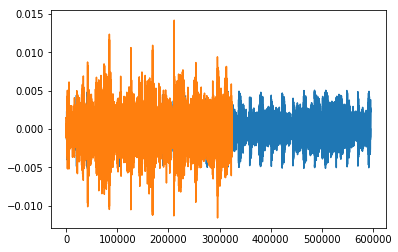

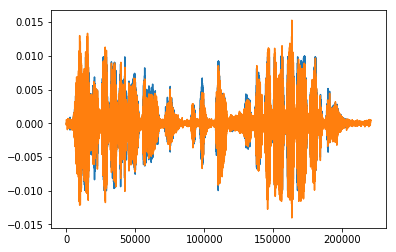

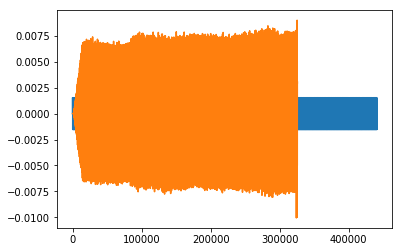

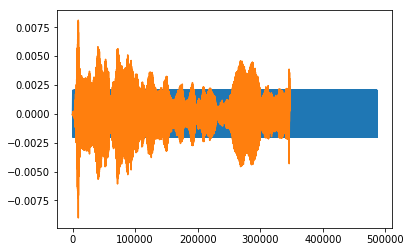

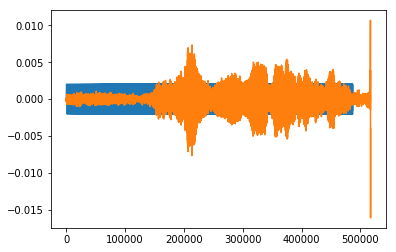

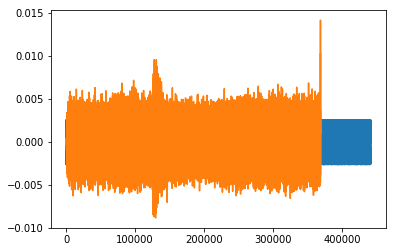

In [42]:
fs = 44100
for signal in signals:
   signals[signal]['u'], signals[signal]['d'] = shift_signals(signals[signal]['u'],signals[signal]['d'],signals[signal]['shift'],fs)

In [0]:
#ordenes para el filtro
Ms = [i for i in range(1,11)]
Ms = np.concatenate((Ms,[10*i for i in range(2,11)]))
Ms = np.concatenate((Ms,[100*i for i in range(2,11)]))
Ms = np.concatenate((Ms,[1000*i for i in range(2,7)]))